<a href="https://colab.research.google.com/github/ajou-y0uC4N/y0uC4N/blob/main/15byte_try_type6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import time
#visualization
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import graphviz
import seaborn as sns
from pandas.plotting import scatter_matrix

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MultiLabelBinarizer

# Oversampling
from imblearn.over_sampling import SMOTE

# PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

# Models
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.svm import LinearSVC, SVC, OneClassSVM
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import reciprocal, uniform

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance
from xgboost import XGBRegressor

# Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics.pairwise import rbf_kernel

# Keras
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow.keras.layers import Input, Dense, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, Nadam

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/univ_pri/UAVCAN/type6.csv')

Mounted at /content/gdrive


In [3]:
data.head()

,type,time,isCan0,priority,messageID,isService,serviceNODEID,byteSize,data[0],data[1],data[2],data[3],data[4],data[5],data[6],data[7],7byteNullCnt,8byteNullCnt
0,Normal,0.000000,1,5,1030,0,1,8,166,53,0,0,0,0,0,156,0,5
1,Normal,0.000180,1,5,1030,0,1,7,0,0,0,0,0,0,124,-1,6,0
2,Normal,0.002787,1,5,1030,0,1,8,166,53,0,0,0,0,0,157,0,5
3,Normal,0.002945,1,5,1030,0,1,7,0,0,0,0,0,0,125,-1,6,0
4,Normal,0.007147,1,5,1030,0,1,8,166,53,0,0,0,0,0,158,0,5


In [4]:
y = data['type']
X = data.drop(columns =['type'])
X = X.drop(columns =['isCan0'])
X = X.drop(columns = ['time'])
X = X.drop(columns=['priority'])
X = X.drop(columns=['serviceNODEID'])
X = X.drop(columns=['isService'])
X = X.drop(columns=['messageID'])
X = X.drop(columns=['7byteNullCnt'])
X = X.drop(columns=['8byteNullCnt'])
data.isnull().sum()
y.unique()
X.head()

,byteSize,data[0],data[1],data[2],data[3],data[4],data[5],data[6],data[7]
0,8,166,53,0,0,0,0,0,156
1,7,0,0,0,0,0,0,124,-1
2,8,166,53,0,0,0,0,0,157
3,7,0,0,0,0,0,0,125,-1
4,8,166,53,0,0,0,0,0,158


In [5]:
# 두행 데이터 row 값 합쳐서 15바이트 만들기

# 새로운 데이터 프레임을 만들기 위해 빈 리스트 준비
merged_data = []

# 행을 두 개씩 묶어서 새로운 행 생성
for i in range(0, len(X), 2):
    if i + 1 < len(X):  # 다음 행이 있는지 확인

        byteSize_sum = X.iloc[i, 0] + X.iloc[i+1, 0]
        new_row = [byteSize_sum]
        # data[0]부터 data[15]까지 결합
        data_part = np.concatenate((X.iloc[i, 1:].to_numpy(), X.iloc[i+1, 1:].to_numpy()))

        # 새로운 행에 추가
        new_row.extend(data_part)

        # merged_data에 추가
        merged_data.append(new_row)

# 새로운 데이터 프레임 생성
columns = ['byteSize'] + [f'data[{i}]' for i in range(16)]
merged_df = pd.DataFrame(merged_data, columns=columns)
merged_df.head()


,byteSize,data[0],data[1],data[2],data[3],data[4],data[5],data[6],data[7],data[8],data[9],data[10],data[11],data[12],data[13],data[14],data[15]
0,15,166,53,0,0,0,0,0,156,0,0,0,0,0,0,124,-1
1,15,166,53,0,0,0,0,0,157,0,0,0,0,0,0,125,-1
2,15,166,53,0,0,0,0,0,158,0,0,0,0,0,0,126,-1
3,15,166,53,0,0,0,0,0,159,0,0,0,0,0,0,127,-1
4,15,166,53,0,0,0,0,0,128,0,0,0,0,0,0,96,-1


In [6]:
X=merged_df
y = y.iloc[::2]
y

0         Normal
2         Normal
4         Normal
6         Normal
8         Normal
           ...  
241312    Normal
241314    Normal
241316    Normal
241318    Normal
241320    Normal
Name: type, Length: 120661, dtype: object

In [8]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
y = y.iloc[:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
#Random Fores
params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1) # gridserach 최적 파라미터
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))
#10분

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
최고 예측 정확도: 0.9656


In [10]:
rf = RandomForestClassifier(n_estimators=100, min_samples_split=20, min_samples_leaf=8, max_depth=8, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=8, min_samples_split=20,
                       n_jobs=-1)

In [11]:
y_pred1 = rf.predict(X_test)

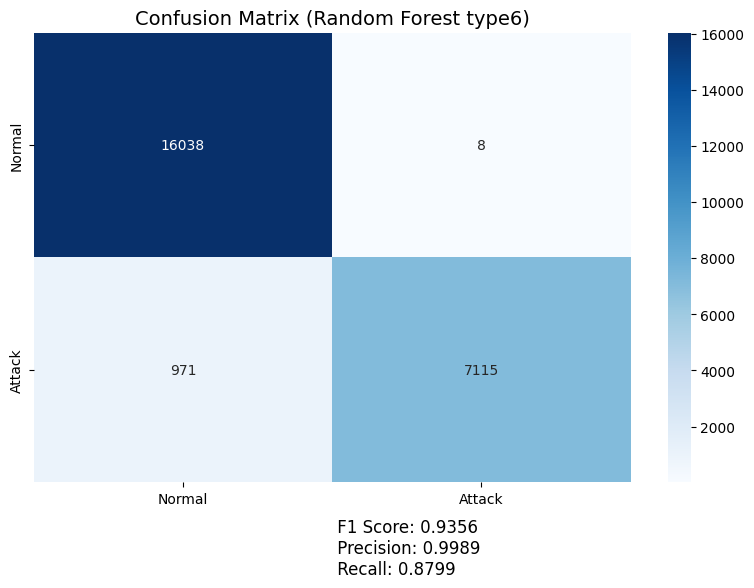

In [12]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# case1 model
cm1 = confusion_matrix(y_test, y_pred1, labels=["Normal", "Attack"])
f1_1 = f1_score(y_test, y_pred1, pos_label="Attack")
precision_1 = precision_score(y_test, y_pred1, pos_label="Attack")
recall_1 = recall_score(y_test, y_pred1, pos_label="Attack")

# 그래프 그리기
# 1행 2열의 subplot 생성 (여기서는 1개의 subplot만 사용)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# 첫 번째 subplot: baseline model
ax.set_title('Confusion Matrix (Random Forest type6)', fontsize=14)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)

# Confusion Matrix에 F1 Score, Precision, Recall 값 추가
ax.text(0.5, -0.1, f'\n\n F1 Score: {f1_1:.4f}    \n Precision: {precision_1:.4f} \n Recall: {recall_1:.4f}',
        horizontalalignment='left', verticalalignment='center', transform=ax.transAxes,
        fontsize=12)

# Heatmap 그리기
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", ax=ax, xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])

# subplot 간 간격 조절
plt.tight_layout()
plt.show()


In [13]:
##### Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# 데이터 분할 (예시)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DecisionTreeClassifier 객체 생성
dt_classifier = DecisionTreeClassifier()

# 그리드 탐색을 위한 매개변수 그리드 정의
dt_param_grid = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# StratifiedKFold를 사용하여 교차 검증 수행
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV 객체 생성 및 교차 검증 수행
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=dt_param_grid, cv=skf, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 가장 성능이 좋은 모델 추출
best_dt_model = grid_search.best_estimator_

# 가장 성능이 좋은 매개변수 및 점수 출력
best_parameters = grid_search.best_params_
best_score = best_dt_model.score(X_test, y_test)

print(f"Best parameters: {best_parameters}")
print(f"Best score: {best_score}")
##Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
##Best score: 0.9875156355239103


Best parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.9936184319575667


In [14]:
y_pred1 = best_dt_model.predict(X_test)

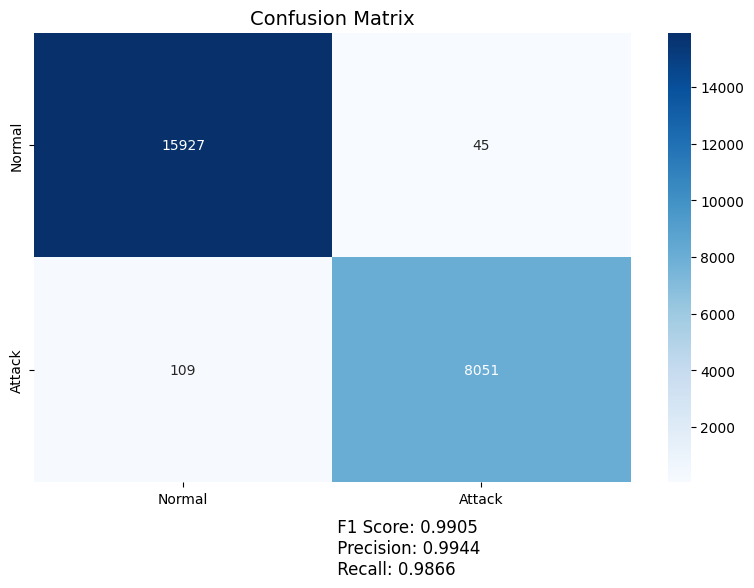

In [15]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# case1 model
cm1 = confusion_matrix(y_test, y_pred1, labels=["Normal", "Attack"])
f1_1 = f1_score(y_test, y_pred1, pos_label="Attack")
precision_1 = precision_score(y_test, y_pred1, pos_label="Attack")
recall_1 = recall_score(y_test, y_pred1, pos_label="Attack")

# 그래프 그리기
# 1행 2열의 subplot 생성 (여기서는 1개의 subplot만 사용)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# 첫 번째 subplot: baseline model
ax.set_title('Confusion Matrix', fontsize=14)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)

# Confusion Matrix에 F1 Score, Precision, Recall 값 추가
ax.text(0.5, -0.1, f'\n\n F1 Score: {f1_1:.4f}    \n Precision: {precision_1:.4f} \n Recall: {recall_1:.4f}',
        horizontalalignment='left', verticalalignment='center', transform=ax.transAxes,
        fontsize=12)

# Heatmap 그리기
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", ax=ax, xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])

# subplot 간 간격 조절
plt.tight_layout()
plt.show()
